In [135]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

figsize=(15, 13)

export_dir = './'
data_dir = './'
file_name = 'tictactoe_g20.npz'
title = 'TicTacToe Row Player Performance with 100 Gameplays'
policy_name = ['SP_s8', 'PP_s3', 'PP_s5', 'FCP_p3', 'FCP_p5']

In [136]:
data_npz = np.load(os.path.join(data_dir, file_name))
pvalue = data_npz['pvalue']
counts = data_npz['total_count']

wins_perc_row = counts[:,:,0,0]/counts[:,:,-1,0]
draws_perc_row = counts[:,:,1,0]/counts[:,:,-1,0]
loses_perc_row = counts[:,:,2,0]/counts[:,:,-1,0]
wins_perc_col = counts[:,:,0,1]/counts[:,:,-1,1]
draws_perc_col = counts[:,:,1,1]/counts[:,:,-1,1]
loses_perc_col = counts[:,:,2,1]/counts[:,:,-1,1]

In [137]:
df_row = pd.DataFrame({'Wins': wins_perc_row.flatten(),
                       'Draws': wins_perc_row.flatten()+draws_perc_row.flatten(),
                       'Loses': np.ones_like(wins_perc_row.flatten()),
                       'Row': np.repeat(policy_name,len(policy_name)),
                       'Col': policy_name*len(policy_name)})
df_col = pd.DataFrame({'Wins': wins_perc_col.flatten(),
                       'Draws': wins_perc_col.flatten()+draws_perc_col.flatten(),
                       'Loses': np.ones_like(wins_perc_col.flatten()),
                       'Row': np.repeat(policy_name,len(policy_name)),
                       'Col': policy_name*len(policy_name)})

In [138]:
df_row.head()

,Wins,Draws,Loses,Row,Col
0,0.190625,0.811719,1.0,SP_s8,SP_s8
1,0.202083,0.793750,1.0,SP_s8,PP_s3
2,0.285000,0.687500,1.0,SP_s8,PP_s5
3,0.178750,0.622500,1.0,SP_s8,FCP_p3
4,0.175000,0.731250,1.0,SP_s8,FCP_p5


Text(-0.01, 0.5, 'Training methods for row player')

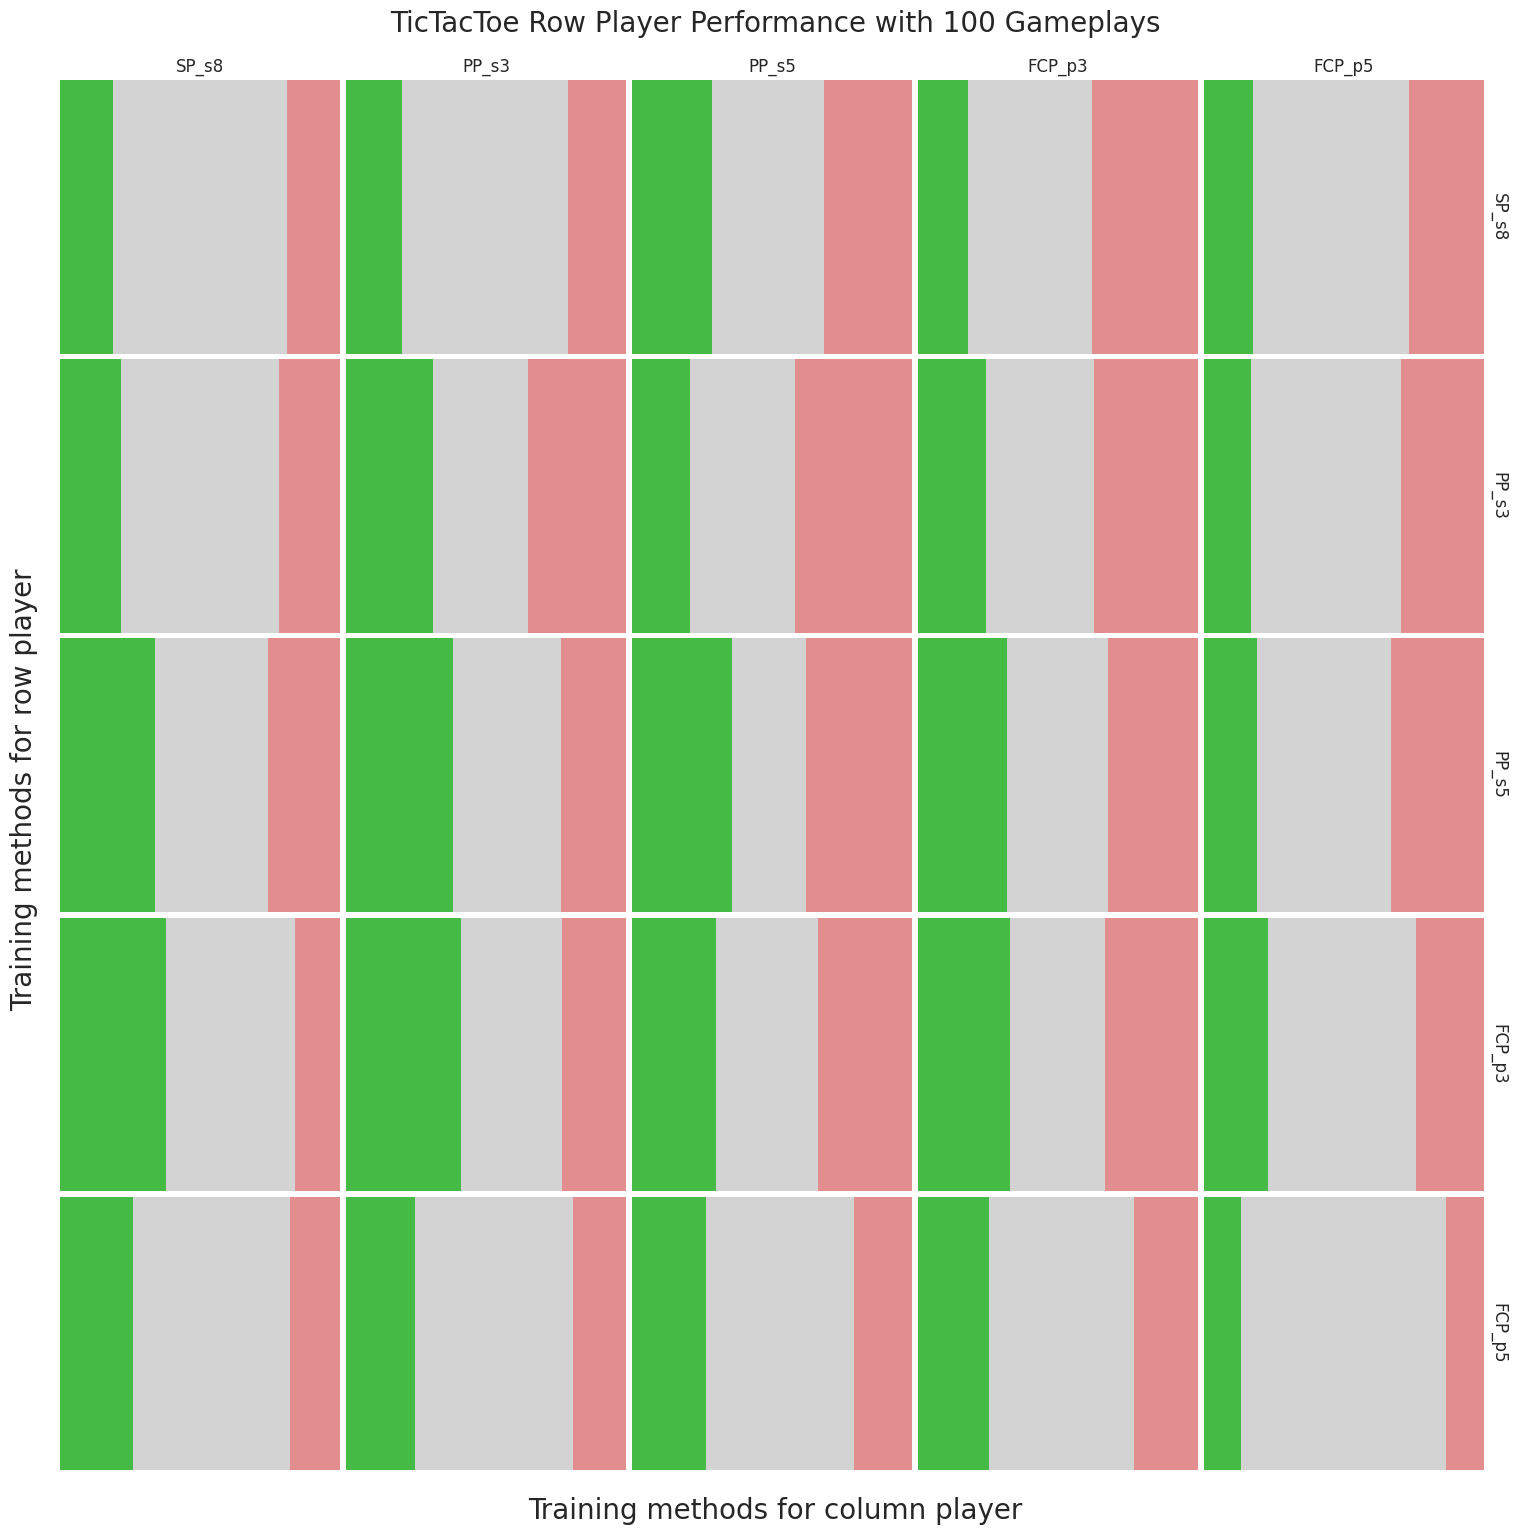

In [159]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df_row, col="Col", row="Row", aspect=1,\
                  margin_titles=True, legend_out=True)
g.map_dataframe(sns.barplot, x="Loses", color="lightcoral", edgecolor = "none", width=1)
g.map_dataframe(sns.barplot, x="Draws", color="lightgray", edgecolor = "none", width=1)
g.map_dataframe(sns.barplot, x="Wins", color="limegreen", edgecolor = "none", width=1)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xticks=[], xlabel="", yticks=[], ylabel="")
g.set(xlim=(0, 1))
g.despine(bottom=True, left=True)
g.figure.subplots_adjust(wspace=0.02, hspace=0.02)

g.fig.suptitle(title, fontsize=20, y=1.02)
g.fig.supxlabel('Training methods for column player', fontsize=20, y=0.01)
g.fig.supylabel('Training methods for row player', fontsize=20, x=-0.01)